In [ ]:
#y=c+m1*Tvmarketing+m2*newsMarketing+m3*internet 
#one independent and one dependent in simple Linear regression
#in y,x1,x2 we will have a plane

In [6]:
import pandas as pd

In [7]:
adve_multi=pd.read_csv('D:\\New folder\\Machine-Learning-with-Real-World-Projects-master\\Section 2\\Multiple Linear Regression\\advertising.csv')

In [8]:
adve_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
adve_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
adve_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
adve_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Visualizing data

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns

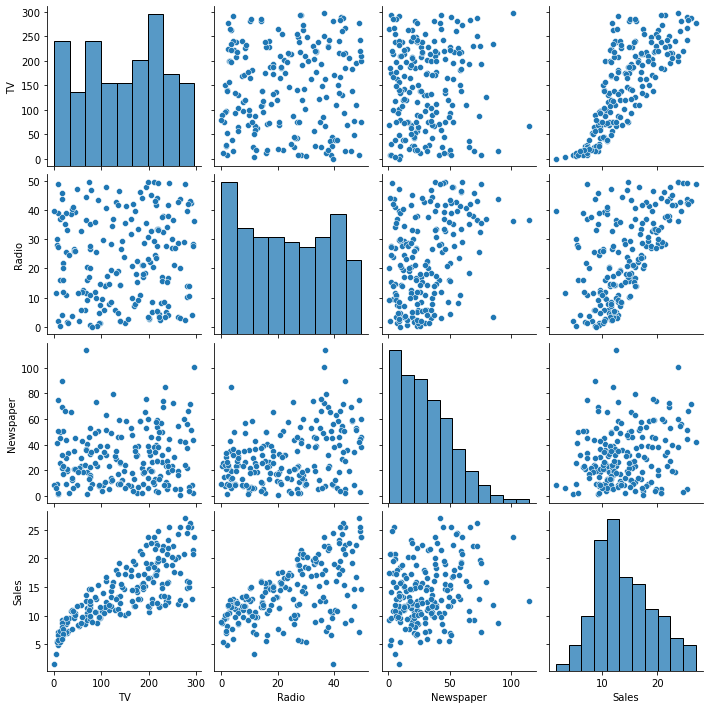

In [10]:
sns.pairplot(adve_multi)

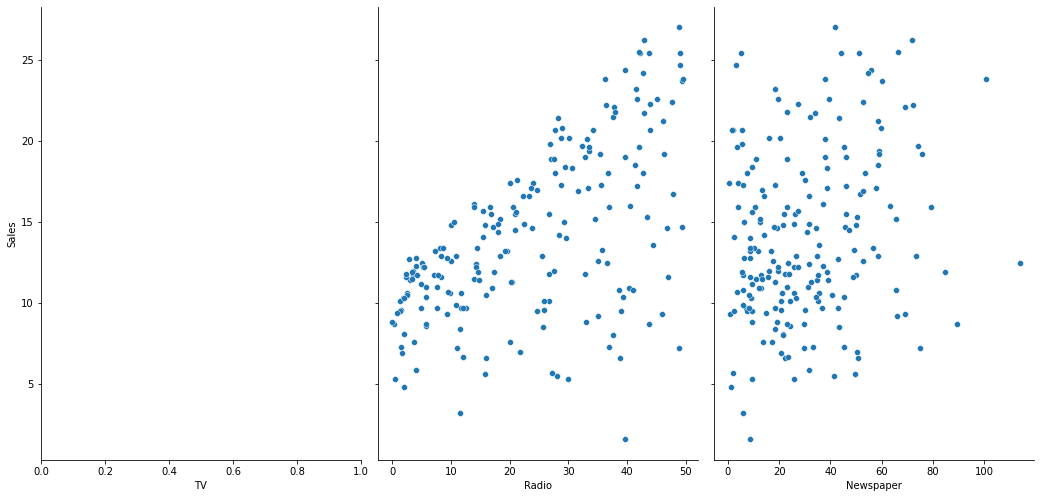

In [11]:
sns.pairplot(adve_multi,x_vars=['TV','Radio','Newspaper'], y_vars='Sales',height=7, aspect=0.7, kind='scatter')

In [ ]:
#radio and Tv has some relation with sales

# Splitting the Data For Training and Testing

In [12]:
#Feature Variable for X
x=adve_multi[['TV','Radio','Newspaper']] 

#Feature Variable for y
y=adve_multi['Sales'] 

In [14]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

# Performing Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression 


In [16]:
lm=LinearRegression()

In [17]:
lm.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [18]:
print(lm.intercept_)

2.6527896688795014


In [20]:
#coeffecient m value 
coeff=pd.DataFrame(lm.coef_,x_test.columns,columns=['Coeffecient'])

In [21]:
coeff

,Coeffecient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


If TV Price increase by 1 unit how it going to affect the sales. 0.045

# Predictions

In [22]:
y_pred=lm.predict(x_test)

# Calculating Error Terms

In [24]:
from sklearn.metrics import mean_squared_error,r2_score 

mse=mean_squared_error(y_test,y_pred) 
r2_square=r2_score(y_test,y_pred)


In [25]:
print("Mean square Error",mse) 
print("r_square",r2_square)

Mean square Error 1.8506819941636945
r_square 0.9058622107532246


# Checking for P-value Using STATSMODELS

In [28]:
import statsmodels.api as sm 

x_train_sm=x_train 

#adding constant because c is not counted just c.1 
x_train_sm=sm.add_constant(x_train_sm)  

#OLS it minimize the sum of squared differences and predicted differnces 
#sales and constant
lm_l=sm.OLS(y_train,x_train_sm).fit() 

lm_l.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [30]:
print(lm_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           9.97e-66
Time:                        20:36:56   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

Stderr: Measure of variability in the estimate of coeffecient
t value: coeff / standard deviation 

==================================================== 

P value:  

Null hypothesis: var is not significant 
Alternative Hypothesis: var is going to be significant 

p>0.05 : fail to reject hypothesis [var not significant]
p<0.05 : reject hypothesis [var significant] 



## News Paper has >0.05 var not significant 



<AxesSubplot:>

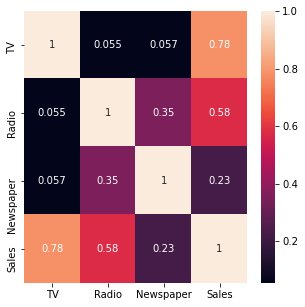

In [31]:
plt.figure(figsize=(5,5)) 
sns.heatmap(adve_multi.corr(),annot=True)

# Implementing the results and running the model again [Removing Newspaper]

In [32]:
x_train_new=x_train[['TV','Radio']] 
x_test_new=x_test[['TV','Radio']]

In [33]:
lm.fit(x_train_new,y_train)

LinearRegression()

In [34]:
y_pred_new=lm.predict(x_test_new)

Text(0, 0.5, 'Sales')

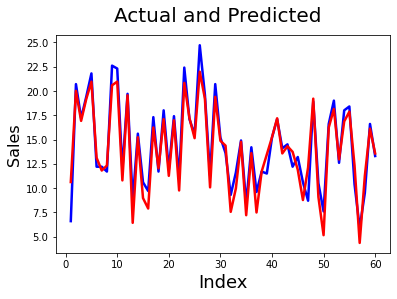

In [35]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) # Plot heading 
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Sales', fontsize=16)                               

Text(0, 0.5, 'Sales')

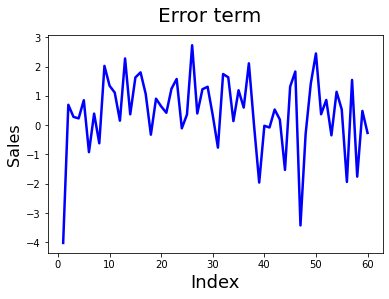

In [37]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error term', fontsize=20) # Plot heading 
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Sales', fontsize=16)   

Most are within not extreme pretty ok in err

In [38]:
#again finding mean square err and rsquare 

mse=mean_squared_error(y_test,y_pred_new) 
r_sq=r2_score(y_test,y_pred_new)

In [40]:
print('MSE',mse) #little reduced
print('r2 square',r_sq)

MSE 1.784740052090281
r2 square 0.909216449171822


In [41]:
import statsmodels.api as sm 

x_train_sm=x_train_new

#adding constant because c is not counted just c.1 
x_train_sm=sm.add_constant(x_train_sm)  

#OLS it minimize the sum of squared differences and predicted differnces 
#sales and constant
lm_l=sm.OLS(y_train,x_train_sm).fit() 

lm_l.params

const    2.719040
TV       0.045533
Radio    0.192488
dtype: float64

In [42]:
print(lm_l.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           4.46e-67
Time:                        21:07:55   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

# 2.71+0.04*TV+0.192*Radio

# Simple Linear regression using newsPaper and sales

In [56]:
x_news = adve_multi['Newspaper']

y_news = adve_multi['Sales']


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_news,y_news,train_size=0.7,random_state=110)

In [58]:
import numpy as np
X_train = x_train[:,np.newaxis]
X_test = x_test[:,np.newaxis]    #only for simple lR 


<ipython-input-58-94b83ab411a7>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = x_train[:,np.newaxis]
<ipython-input-58-94b83ab411a7>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = x_test[:,np.newaxis]    #only for simple lR


In [59]:
lm.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred=lm.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing mean square error and R square value
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 23.84732008485191
r_square_value : 0.08182413570736657


In [ ]:
MSE of 23 says poor model if considered newspaper